In [1]:
#Libraries
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
tf.__version__

'1.13.1'

## Step1 Load Dataset and Plot Dataset

In [3]:

from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("/tmp/data/", one_hot = True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
#Total 70,000 Images
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Validation-set:\t{}".format(len(data.test.labels)))
print("- Test-set:\t\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Validation-set:	10000
- Test-set:		5000


### One Hot Encoding

The output-data is loaded as both integer class-numbers and so-called One-Hot encoded arrays. This means the class-numbers have been converted from a single integer to a vector whose length equals the number of possible classes. All elements of the vector are zero except for the $i$'th element which is 1 and means the class is $i$.


In [5]:
print("data.test.labels")
print(data.test.labels[0:10,:])
#We will convert the one hot encoded into a single number which is the highest element in the row and
#it is computed by using the np.argmax() function.
data.test.cls = np.array([label.argmax() for label in data.test.labels])
print("data.test.cls")
print(data.test.cls[0:10])

#Image Size
img_size = 28
img_size_flat = 28*28
img_shape = (28,28)
num_classes = 10

data.test.labels
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
data.test.cls
[7 2 1 0 4 1 4 9 5 9]


In [6]:
#PLOT FUNCTION
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    fig, axes = plt.subplots(3,3)
    fig.subplots_adjust(hspace=0.3,wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(img_shape), cmap = 'binary')
    
    # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()


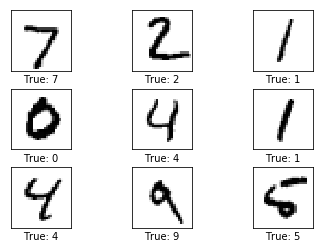

In [7]:
#Plot The Images
# Get the first images from the test-set.
images = data.test.images[0:9]

# Get the true classes for those images.
cls_true = data.test.cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

## Step2 Tensorflow Setup Part A Tensorflow Graph
A TensorFlow graph consists of the following parts which will be detailed below:

* Placeholder variables used to feed input into the graph.
* Model variables that are going to be optimized so as to make the model perform better.
* The model which is essentially just a mathematical function that calculates some output given the input in the     placeholder variables and the model variables.
* A cost measure that can be used to guide the optimization of the variables.
* An optimization method which updates the variables of the model.

### A.1 Placeholder variables
Placeholder variables serve as the input to the graph that we may change each time we execute the graph. We call this feeding the placeholder variables.

Where x is a multi-dimensional vector or matrix. The data-type is set to float32 and the shape is set to 
[None, img_size_flat], where None means that the tensor may hold an arbitrary number of images with each image being a vector of length img_size_flat.

In [8]:
x = tf.placeholder(tf.float32, [None, img_size_flat])
y_true = tf.placeholder(tf.float32, [None, num_classes])
y_true_cls = tf.placeholder(tf.int64, [None])

### A.2 Variables to be optimized


In [10]:
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))
biases = tf.Variable(tf.zeros([num_classes]))

### A.3 Model

This simple mathematical model multiplies the images in the placeholder variable x with the weights and then adds the biases.

In [11]:
logits = tf.matmul(x, weights) + biases
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, axis=1)

###  A.4 Cost-function to be optimized

The cross-entropy is a performance measure used in classification. The cross-entropy is a continuous function that is always positive and if the predicted output of the model exactly matches the desired output then the cross-entropy equals zero. The goal of optimization is therefore to minimize the cross-entropy so it gets as close to zero as possible by changing the weights and biases of the model.

Cost, a single scalar value. Calculated by taking the average of cross-entropy for all the image classifications.

In [12]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y_true)
cost = tf.reduce_mean(cross_entropy)

### A.5 Optimization method and Performance measures

Now that we have a cost measure that must be minimized, we can then create an optimizer. In this case it is the basic form of Gradient Descent where the step-size is set to 0.5.

In [13]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

#vctor of booleans whether the predicted class equals the true class of each image
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
#first type-casting the vector of booleans to floats, so that False becomes 0 and True becomes 1, 
#and then calculating the average of these numbers.
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Step 2 Tensorflow Run Part B TensorFlow Session


In [14]:
session = tf.Session()
#Once the TensorFlow graph has been created, we have to create a 
#TensorFlow session which is used to execute the graph.

session.run(tf.global_variables_initializer())
#The variables for weights and biases must be initialized before we start optimizing them.

batch_size = 100
#Stochastic Gradient Descent which only uses a small batch of images in each iteration of the optimizer.

feed_dict_test = {x: data.test.images,
                  y_true: data.test.labels,
                  y_true_cls: data.test.cls}

In [15]:
#Optimize Function

def optimize(num_iterations):
    for i in range(num_iterations):
        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = data.train.next_batch(batch_size=batch_size)
        
        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        # Note that the placeholder for y_true_cls is not set
        # because it is not used during training.
        feed_dict_train = {x: x_batch, y_true: y_true_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)

## Performance

def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    
    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))
    


In [16]:
print_accuracy()

Accuracy on test-set: 9.8%


In [17]:
optimize(num_iterations=1)
print_accuracy()

Accuracy on test-set: 24.2%


In [18]:
optimize(num_iterations=1000)
print_accuracy()

Accuracy on test-set: 91.9%


In [19]:
optimize(num_iterations=10000)
print_accuracy()

Accuracy on test-set: 92.5%
